In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
A1G = pd.read_csv("c:/Users/Owner/BootCampData/Final_Project/CSVs/A1G.F.csv")

In [25]:
BA = pd.read_csv("c:/Users/Owner/BootCampData/Final_Project/Resources/BA.csv")

In [26]:
CSX = pd.read_csv("c:/Users/Owner/BootCampData/Final_Project/CSVs/CSX.csv")

In [27]:
print(f'A1G:')
print(A1G.head())

A1G:
       Date       Open       High        Low      Close  Adj Close  Volume
0  1/2/2019  27.809999  28.650000  27.549999  28.650000  28.251038     4.0
1  1/3/2019  27.570000  27.570000  25.969999  26.250000  25.884460     5.0
2  1/4/2019  26.200001  27.059999  26.200001  27.059999  26.683180     0.0
3  1/7/2019  27.959999  27.959999  27.900000  27.940001  27.550928   178.0
4  1/8/2019  28.620001  29.010000  28.620001  28.879999  28.477835   100.0


In [73]:
BA = BA.drop(BA.columns[0], axis = 1)
print(f'BA:')
print(BA.head())

AttributeError: 'function' object has no attribute 'drop'

In [31]:
print(f'CSX:')
print(CSX.head())

CSX:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2019-01-02  60.759998  62.250000  60.020000  61.950001  61.114838  5012900
1  2019-01-03  61.360001  61.810001  60.360001  60.980000  60.157917  7842400
2  2019-01-04  61.000000  62.830002  60.529999  62.790001  61.943512  6181200
3  2019-01-07  62.430000  63.070000  61.349998  62.450001  61.608097  6262300
4  2019-01-08  63.779999  64.180000  62.639999  63.349998  62.495960  5079300


In [33]:
A1G_X = A1G["Volume"].values.reshape(-1, 1)
A1G_y = A1G["Close"].values.reshape(-1, 1)
print(A1G_X.shape,A1G_y.shape)

(273, 1) (273, 1)


In [34]:
CSX_X = CSX["Volume"].values.reshape(-1, 1)
CSX_y = CSX["Close"].values.reshape(-1, 1)
print(CSX_X.shape,CSX_y.shape)

(273, 1) (273, 1)


In [35]:
BA_X = BA["Volume"].values.reshape(-1, 1)
BA_y = BA["Close"].values.reshape(-1, 1)
print(BA_X.shape,BA_y.shape)

(252, 1) (252, 1)


Text(0, 0.5, 'Closing Price')

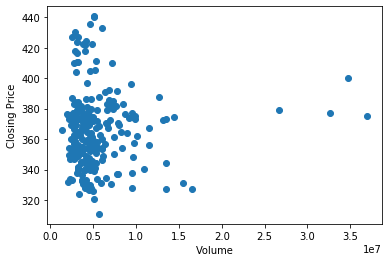

In [36]:
#checking the trends
plt.scatter(BA_X, BA_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

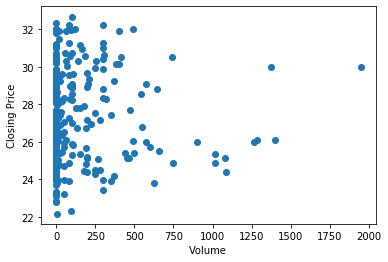

In [37]:
plt.scatter(A1G_X, A1G_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

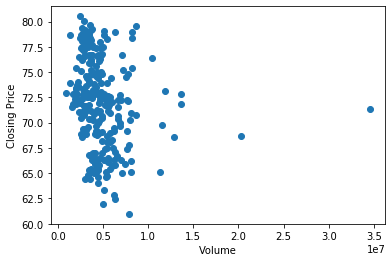

In [38]:
plt.scatter(CSX_X, CSX_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

In [67]:
X_train, X_test, y_train, y_test = train_test_split(A1G_X, A1G_y, random_state = 42 )
myModel1 = LinearRegression()

In [68]:
myModel1.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [65]:
predicted = myModel1.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 503.96079841162503
R-squared (R2 ): -0.005779709474097672


In [66]:
myModel1.score(X_test, y_test)

-0.005779709474097672